In [2]:
import glob
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd

In [14]:
lk.search_lightcurve('KIC 11180361')

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr011180361,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr011180361,0.0
2,Kepler Quarter 03,2009,Kepler,60,kplr011180361,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr011180361,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr011180361,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr011180361,0.0
6,Kepler Quarter 06,2010,Kepler,60,kplr011180361,0.0
7,Kepler Quarter 06,2010,Kepler,60,kplr011180361,0.0
8,Kepler Quarter 06,2010,Kepler,60,kplr011180361,0.0


In [2]:
df = pd.read_csv("../data/catalogues/rev_AF_stars.csv", dtype={'kic': str})
candidates = pd.read_csv("candidates.csv", dtype={'kic': str}, delimiter='\t')
kicid = [
    '12116239',
'9471419',
'11666429',
'9895543',
'9875566',
'8456151',
'8249829',
'8057661',
'7975162',
'7767699',
'4380834',
'5724523'
]
candidates = candidates[candidates.kic.isin(kicid)]

In [3]:
df = df.merge(candidates, left_on='kic', right_on='kic')

In [4]:
df

,kic,source_id,sdss_g,parallax,parallax_error,Ag_Green_2017,Ag_Green_2017_sigma,Teffi,e_Teffi,FeHi,...,new_mass,new_mass_std,mass_qflag,loglbol_g_median,loglbol_sigp,loglbol_sigm,dSct,period,t0,bls_depth
0,4380834,2076217259966879488,14.172,0.731,0.023,0.54,0.05,7613,80,0.08,...,1.44,0.25,5,0.723,0.038,0.038,1,0.889871,-729.138777,0.200316
1,5724523,2076780141199369472,13.577,0.501,0.015,1.00,0.11,7350,257,-0.18,...,1.91,0.25,0,1.470,0.052,0.051,1,0.545737,-735.105918,0.016599
2,7767699,2078789734909398144,11.836,1.109,0.023,0.45,0.07,8230,288,-0.02,...,1.75,0.25,0,1.206,0.032,0.032,1,1.128280,-734.116164,0.008033
3,7975162,2078812863320308736,12.643,0.739,0.025,0.58,0.04,7082,219,-0.21,...,1.83,0.25,0,1.369,0.037,0.037,1,37.829557,127.479715,1.044000
4,8057661,2076042403255932544,11.520,0.310,0.046,1.41,0.10,8453,295,-0.10,...,0.00,0.25,6,2.895,0.154,0.135,1,24.422897,133.503250,0.156800
5,8249829,2078915976894229888,14.487,0.478,0.019,0.76,0.04,7109,248,-0.11,...,1.58,0.25,0,1.078,0.042,0.041,1,1.012885,-58.896685,0.161843
6,8456151,2079118179651367040,11.633,1.704,0.075,0.57,0.18,6531,228,-0.92,...,1.50,0.25,0,1.086,0.076,0.076,1,28.287995,121.275677,0.496600
7,9471419,2128101804925014272,13.195,0.806,0.022,0.30,0.03,7283,258,-0.27,...,1.50,0.25,0,0.950,0.031,0.031,2,1.128135,-735.011198,0.110165
8,9875566,2107548393545063808,11.716,0.814,0.027,0.18,0.02,7196,251,-0.25,...,1.82,0.25,0,1.476,0.034,0.034,1,14.174346,-733.356230,1.063390
9,9895543,2128202891276181888,12.704,0.771,0.022,0.33,0.04,7775,272,-0.05,...,1.68,0.25,0,1.156,0.035,0.034,1,1.218882,-734.346207,0.020572


In [65]:
ii = 2
row = df.iloc[ii]
f = glob.glob(f"../prewhitening/results/spline and BIC/prewhitened/*{row.kic}*")[0]
time, flux, flux_err = np.loadtxt(f, unpack=True)
lc = lk.LightCurve(time, flux + 1., flux_err)
lc = lc.flatten(window_length=201, break_tolerance=11).remove_outliers(sigma_upper=5, sigma_lower=5)
time, flux, flux_err = lc.time.value, lc.flux.value, lc.flux_err.value
flux_err /= 1e3
flux -= 1.

/home/daniel/anaconda3/envs/exoplanet_test/lib/python3.8/site-packages/lightkurve/lightcurve.py:205: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(


In [66]:
row

kic                                7767699
source_id              2078789734909398144
sdss_g                              11.836
parallax                             1.109
parallax_error                       0.023
Ag_Green_2017                         0.45
Ag_Green_2017_sigma                   0.07
Teffi                                 8230
e_Teffi                                288
FeHi                                 -0.02
e_FeHi                                 0.3
new_logg                              4.09
new_logg_std                          0.09
new_radius                            1.97
new_r_std                             0.15
new_mass                              1.75
new_mass_std                          0.25
mass_qflag                               0
loglbol_g_median                     1.206
loglbol_sigp                         0.032
loglbol_sigm                         0.032
dSct                                     1
period                             1.12828
t0         

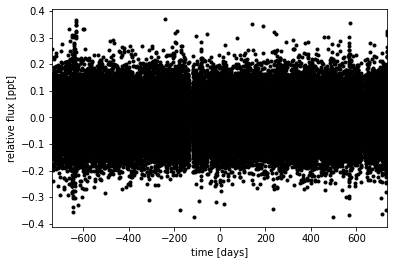

In [67]:
m = np.ones_like(time, dtype=bool)
ref_time = 0.5 * (np.min(time) + np.max(time))
x = np.ascontiguousarray(time[m] - ref_time, dtype=np.float64)
y = np.ascontiguousarray(flux[m], dtype=np.float64)
yerr = np.ascontiguousarray(flux_err[m], dtype=np.float64)
#
plt.plot(x, y, ".k")
plt.xlabel("time [days]")
plt.ylabel("relative flux [ppt]")
_ = plt.xlim(x.min(), x.max())


texp = np.min(np.diff(x))

In [68]:
yerr

array([5.33202129e-05, 5.33036000e-05, 5.32977225e-05, ...,
       5.62473442e-05, 5.60234318e-05, 5.60502387e-05])

In [69]:
bls_period = row.period
bls_t0 = row.t0
bls_depth = row.bls_depth# / 1e3

In [70]:
row.new_mass, row.new_mass_std
row.new_radius, row.new_r_std

(1.97, 0.15)

In [81]:
import exoplanet as xo
import pymc3 as pm
import aesara_theano_fallback.tensor as tt

import pymc3_ext as pmx
from celerite2.theano import terms, GaussianProcess


def build_model(mask=None, start=None):
    if mask is None:
        mask = np.ones(len(x), dtype=bool)
    with pm.Model() as model:

        # Parameters for the stellar properties
        mean = pm.Normal("mean", mu=0.0, sd=10.0)
        u_star = xo.QuadLimbDark("u_star")

        # Stellar parameters from Huang et al (2018)
#         M_star_huang = row.new_mass, row.new_mass_std
#         R_star_huang = row.new_radius, row.new_r_std
#         BoundedNormal = pm.Bound(pm.Normal, lower=0, upper=3)
#         m_star = BoundedNormal(
#             "m_star", mu=M_star_huang[0], sd=M_star_huang[1]
#         )
#         r_star = BoundedNormal(
#             "r_star", mu=R_star_huang[0], sd=R_star_huang[1]
#         )

        # Orbital parameters for the planets
        t0 = pm.Normal("t0", mu=bls_t0, sd=1)
        log_period = pm.Normal("log_period", mu=np.log(bls_period), sd=1)
        log_ror = pm.Normal(
            "log_ror", mu=0.5 * np.log(bls_depth * 1e-3), sigma=10.0
        )
        ror = pm.Deterministic("ror", tt.exp(log_ror))
        
        period = pm.Deterministic("period", tt.exp(log_period))
        b = xo.distributions.ImpactParameter("b", ror=ror)
        
        log_dur = pm.Normal("log_dur", mu=np.log(0.1), sigma=10.0)
        dur = pm.Deterministic("dur", tt.exp(log_dur))
        
        # Transit jitter & GP parameters
        log_sigma_lc = pm.Normal(
            "log_sigma_lc", mu=np.log(np.std(y[mask])), sd=10
        )
        log_rho_gp = pm.Normal("log_rho_gp", mu=0, sd=10)
        log_sigma_gp = pm.Normal(
            "log_sigma_gp", mu=np.log(np.std(y[mask])), sd=10
        )

        
        # Orbit model
        orbit = xo.orbits.KeplerianOrbit(
            period=period,
            t0=t0,
            b=b,
            duration=dur
        )
        

        # Compute the model light curve
        light_curves = pm.Deterministic(
            "light_curves",
            xo.LimbDarkLightCurve(u_star).get_light_curve(
                orbit=orbit, r=ror, t=x[mask], 
                texp=texp
            )
            * 1e3,
        )
        light_curve = tt.sum(light_curves, axis=-1) + mean
        resid = y[mask] - light_curve
        
        # GP model for the light curve
        kernel = terms.SHOTerm(
            sigma=tt.exp(log_sigma_gp),
            rho=tt.exp(log_rho_gp),
            Q=1 / np.sqrt(2),
        )
        gp = GaussianProcess(kernel, t=x[mask], yerr=tt.exp(log_sigma_lc))
        gp.marginal("gp", observed=resid)
        pm.Deterministic("gp_pred", gp.predict(resid))

        # Fit for the maximum a posteriori parameters, I've found that I can get
        # a better solution by trying different combinations of parameters in turn
        if start is None:
            start = model.test_point
        map_soln = pmx.optimize(
            start=start, vars=[log_sigma_lc, log_sigma_gp, log_rho_gp]
        )
        map_soln = pmx.optimize(start=map_soln, vars=[dur, log_ror])
        map_soln = pmx.optimize(start=map_soln, vars=[b])
        map_soln = pmx.optimize(start=map_soln, vars=[log_period, t0])
        map_soln = pmx.optimize(start=map_soln, vars=[u_star])
        map_soln = pmx.optimize(start=map_soln, vars=[dur, log_ror])
        map_soln = pmx.optimize(start=map_soln, vars=[b])
#         map_soln = pmx.optimize(start=map_soln, vars=[ecs])
        map_soln = pmx.optimize(start=map_soln, vars=[dur])
        map_soln = pmx.optimize(start=map_soln, vars=[mean])
        map_soln = pmx.optimize(
            start=map_soln, vars=[log_sigma_lc, log_sigma_gp, log_rho_gp]
        )
        map_soln = pmx.optimize(start=map_soln)

    return model, map_soln


model0, map_soln0 = build_model()

optimizing logp for variables: [log_rho_gp, log_sigma_gp, log_sigma_lc]


message: Optimization terminated successfully.
logp: 74676.57989414275 -> 78789.41177048549
optimizing logp for variables: [log_ror, log_dur]


message: Optimization terminated successfully.
logp: 78789.41177048549 -> 78793.71280729894
optimizing logp for variables: [b, log_ror]


message: Optimization terminated successfully.
logp: 78793.71280729894 -> 78793.71332929944
optimizing logp for variables: [t0, log_period]


message: Desired error not necessarily achieved due to precision loss.
logp: 78793.71332929944 -> 78793.78560327104
optimizing logp for variables: [u_star]


message: Optimization terminated successfully.
logp: 78793.78560327104 -> 78793.79251171008
optimizing logp for variables: [log_ror, log_dur]


message: Desired error not necessarily achieved due to precision loss.
logp: 78793.79251171008 -> 78793.80968532167
optimizing logp for variables: [b, log_ror]


message: Optimization terminated successfully.
logp: 78793.80968532167 -> 78793.80968563362
optimizing logp for variables: [log_dur]


message: Desired error not necessarily achieved due to precision loss.
logp: 78793.80968563362 -> 78793.80968564864
optimizing logp for variables: [mean]


message: Optimization terminated successfully.
logp: 78793.80968564864 -> 78796.26922772612
optimizing logp for variables: [log_rho_gp, log_sigma_gp, log_sigma_lc]


message: Optimization terminated successfully.
logp: 78796.26922772612 -> 78796.27085187323
optimizing logp for variables: [log_sigma_gp, log_rho_gp, log_sigma_lc, log_dur, b, log_ror, log_period, t0, u_star, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 78796.27085187323 -> 78796.56258280038


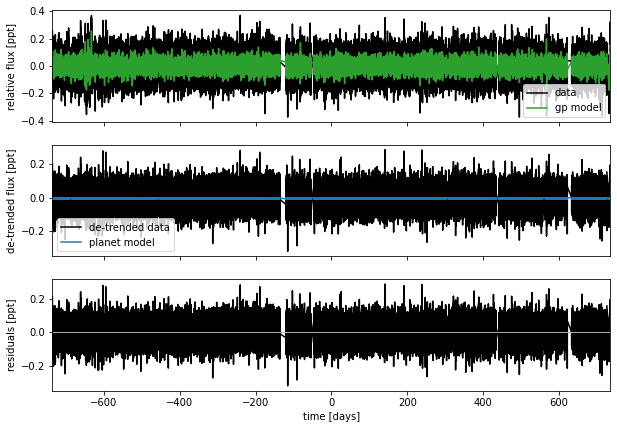

In [82]:
def plot_light_curve(soln, mask=None):
    if mask is None:
        mask = np.ones(len(x), dtype=bool)

    fig, axes = plt.subplots(3, 1, figsize=(10, 7), sharex=True)

    ax = axes[0]
    ax.plot(x[mask], y[mask], "k", label="data")
    gp_mod = soln["gp_pred"] + soln["mean"]
    ax.plot(x[mask], gp_mod, color="C2", label="gp model")
    ax.legend(fontsize=10)
    ax.set_ylabel("relative flux [ppt]")

    ax = axes[1]
    ax.plot(x[mask], y[mask] - gp_mod, "k", label="de-trended data")
    for i, l in enumerate("a"):
        mod = soln["light_curves"][:, i]
        ax.plot(x[mask], mod, label="planet model")
    ax.legend(fontsize=10, loc=3)
    ax.set_ylabel("de-trended flux [ppt]")

    ax = axes[2]
    mod = gp_mod + np.sum(soln["light_curves"], axis=-1)
    ax.plot(x[mask], y[mask] - mod, "k")
    ax.axhline(0, color="#aaaaaa", lw=1)
    ax.set_ylabel("residuals [ppt]")
    ax.set_xlim(x[mask].min(), x[mask].max())
    ax.set_xlabel("time [days]")

    return fig


_ = plot_light_curve(map_soln0)

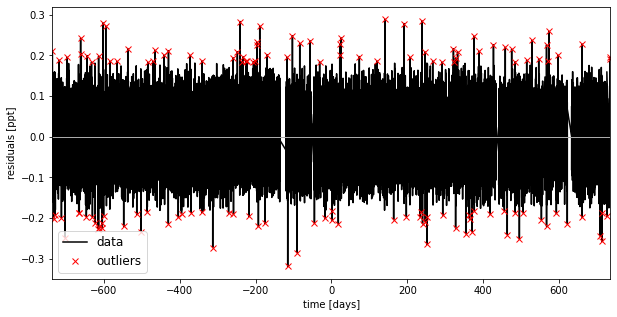

In [83]:
mod = (
    map_soln0["gp_pred"]
    + map_soln0["mean"]
    + np.sum(map_soln0["light_curves"], axis=-1)
)
resid = y - mod
rms = np.sqrt(np.median(resid ** 2))
mask = np.abs(resid) < 5 * rms

plt.figure(figsize=(10, 5))
plt.plot(x, resid, "k", label="data")
plt.plot(x[~mask], resid[~mask], "xr", label="outliers")
plt.axhline(0, color="#aaaaaa", lw=1)
plt.ylabel("residuals [ppt]")
plt.xlabel("time [days]")
plt.legend(fontsize=12, loc=3)
_ = plt.xlim(x.min(), x.max())

optimizing logp for variables: [log_rho_gp, log_sigma_gp, log_sigma_lc]


message: Desired error not necessarily achieved due to precision loss.
logp: 79578.83939497315 -> 79595.29096366712
optimizing logp for variables: [log_ror, log_dur]


message: Desired error not necessarily achieved due to precision loss.
logp: 79595.29096366712 -> 79595.30036967939
optimizing logp for variables: [b, log_ror]


message: Optimization terminated successfully.
logp: 79595.30036967939 -> 79595.30037034427
optimizing logp for variables: [t0, log_period]


message: Desired error not necessarily achieved due to precision loss.
logp: 79595.30037034427 -> 79595.30039323261
optimizing logp for variables: [u_star]


message: Optimization terminated successfully.
logp: 79595.30039323261 -> 79595.30058980147
optimizing logp for variables: [log_ror, log_dur]


message: Optimization terminated successfully.
logp: 79595.30058980147 -> 79595.30061541282
optimizing logp for variables: [b, log_ror]


message: Optimization terminated successfully.
logp: 79595.30061541282 -> 79595.30061567371
optimizing logp for variables: [log_dur]


message: Optimization terminated successfully.
logp: 79595.30061567371 -> 79595.30061567397
optimizing logp for variables: [mean]


message: Optimization terminated successfully.
logp: 79595.30061567397 -> 79595.30062964601
optimizing logp for variables: [log_rho_gp, log_sigma_gp, log_sigma_lc]


message: Optimization terminated successfully.
logp: 79595.30062964601 -> 79595.30063007967
optimizing logp for variables: [log_sigma_gp, log_rho_gp, log_sigma_lc, log_dur, b, log_ror, log_period, t0, u_star, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 79595.30063007967 -> 79595.30065482674


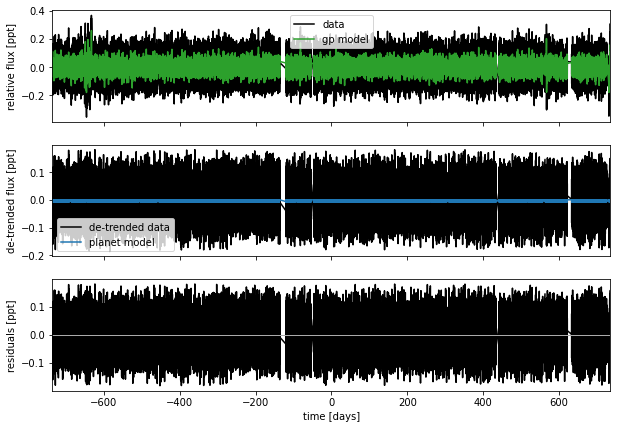

In [84]:
model, map_soln = build_model(mask, map_soln0)
_ = plot_light_curve(map_soln, mask)

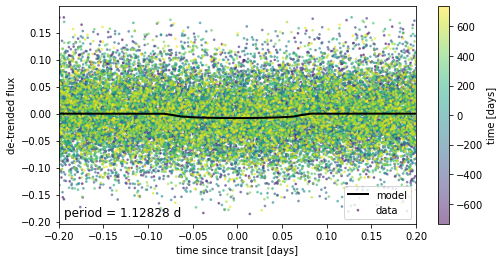

In [85]:
plt.figure(figsize=(8, 4))


# Compute the GP prediction
gp_mod = map_soln["gp_pred"] + map_soln["mean"]

# Get the posterior median orbital parameters
p = map_soln["period"]
t0 = map_soln["t0"]

# Plot the folded data
x_fold = (x[mask] - t0 + 0.5 * p) % p - 0.5 * p
# plt.plot(x_fold, y[mask]- gp_mod, 
#          ".k", label="data", zorder=-1000)
plt.scatter(x_fold, y[mask]- gp_mod, c=x[mask], s=3, alpha=0.5,
         label="data", zorder=-1000)
plt.colorbar(label="time [days]")
# Plot the folded model
inds = np.argsort(x_fold)
inds = inds[np.abs(x_fold)[inds] < 0.3]
pred = map_soln["light_curves"][inds, 0]

plt.plot(x_fold[inds], pred, color="black", linewidth=2, label="model")

# Annotate the plot with the planet's period
txt = "period = {0:.5f} d".format(
    map_soln["period"], #map_soln["period"]
)
plt.annotate(
    txt,
    (0, 0),
    xycoords="axes fraction",
    xytext=(5, 5),
    textcoords="offset points",
    ha="left",
    va="bottom",
    fontsize=12,
)


plt.legend(fontsize=10, loc=4)
plt.xlim(-0.5 * p, 0.5 * p)
plt.xlabel("time since transit [days]")
plt.ylabel("de-trended flux")
_ = plt.xlim(-0.2, 0.2)

# plt.savefig(f'figs/{row.kic}.png', dpi=300, bbox_inches='tight')

In [87]:
map_soln

{'mean': array(0.00118348),
 'u_star_quadlimbdark__': array([-0.03421877,  0.12236005]),
 't0': array(-734.11597669),
 'log_period': array(0.12069386),
 'log_ror': array(-5.94000377),
 'b_impact__': array(-0.02743541),
 'log_dur': array(-1.92183464),
 'log_sigma_lc': array(-2.80743593),
 'log_rho_gp': array(-1.42215375),
 'log_sigma_gp': array(-3.08464793),
 'u_star': array([ 0.74386793, -0.04283574]),
 'ror': array(0.00263202),
 'period': array(1.12827945),
 'b': array(0.49443954),
 'dur': array(0.14633824),
 'light_curves': array([[-0.00754504],
        [-0.00627344],
        [-0.00191472],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]),
 'gp_pred': array([-0.01997702, -0.00366965,  0.01908793, ...,  0.1160005 ,
         0.0987118 ,  0.08168854])}

In [76]:
np.random.seed(1)
with model:
    trace = pmx.sample(
        tune=1000,
        draws=1000,
        start=map_soln,
        cores=2,
        chains=2,
        initial_accept=0.8,
        target_accept=0.95,
        return_inferencedata=False,
    )
    
#     pm.save_trace(trace, f'traces/{row.kic}')

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [log_sigma_gp, log_rho_gp, log_sigma_lc, log_dur, b, log_ror, log_period, t0, u_star, mean]


ValueError: Not enough samples to build a trace.

In [23]:
import pickle # python3

with open(f'traces/{row.kic}.pkl', 'wb') as buff:
    pickle.dump({'model': model, 'trace': trace, 'time': x, 'flux': y, 'mask': mask}, buff)

In [24]:
import arviz as az

with model:
    trace = az.from_pymc3(trace)

In [25]:
pm.summary(
    trace,
    var_names=[
        "omega",
        "ecc",
        "r_pl",
        "b",
        "t0",
        "period",
        "r_star",
        "m_star",
        "u_star",
        "mean",
    ],
)



,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
omega,-0.615,1.740,-3.135,2.685,0.048,0.034,1435.0,1681.0,1.0
ecc,0.202,0.157,0.001,0.493,0.005,0.004,1065.0,825.0,1.0
r_pl,0.009,0.001,0.007,0.011,0.000,0.000,1461.0,1187.0,1.0
b,0.331,0.206,0.007,0.676,0.007,0.005,943.0,866.0,1.0
t0,-734.349,0.013,-734.370,-734.324,0.000,0.000,1005.0,839.0,1.0
period,1.219,0.000,1.219,1.219,0.000,0.000,904.0,1102.0,1.0
r_star,2.133,0.161,1.836,2.425,0.004,0.003,1649.0,904.0,1.0
m_star,1.653,0.244,1.241,2.150,0.006,0.005,1461.0,1189.0,1.0
u_star[0],0.694,0.444,0.000,1.431,0.012,0.008,1329.0,1014.0,1.0
u_star[1],-0.010,0.400,-0.690,0.733,0.010,0.009,1628.0,1253.0,1.0


In [26]:
plt.style.use('science')

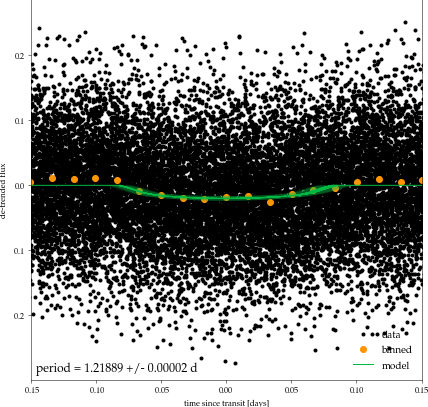

In [27]:
plt.figure(figsize=[7,7])


flat_samps = trace.posterior.stack(sample=("chain", "draw"))

# Compute the GP prediction
gp_mod = np.median(
    flat_samps["gp_pred"].values + flat_samps["mean"].values[None, :], axis=-1
)

# Get the posterior median orbital parameters
p = np.median(flat_samps["period"])
t0 = np.median(flat_samps["t0"])

# Plot the folded data
x_fold = (x[mask] - t0 + 0.5 * p) % p - 0.5 * p
plt.plot(x_fold, y[mask] - gp_mod, ".k", label="data", zorder=-1000)

# Overplot the phase binned light curve
bins = np.linspace(-0.41, 0.41, 50)
denom, _ = np.histogram(x_fold, bins)
num, _ = np.histogram(x_fold, bins, weights=y[mask])
denom[num == 0] = 1.0
plt.plot(
    0.5 * (bins[1:] + bins[:-1]), num / denom, "o", color="C2", label="binned"
)

# Plot the folded model
inds = np.argsort(x_fold)
inds = inds[np.abs(x_fold)[inds] < 0.3]
pred = np.percentile(
    flat_samps["light_curves"][inds, 0], [16, 50, 84], axis=-1
)
plt.plot(x_fold[inds], pred[1], color="C1", label="model")
art = plt.fill_between(
    x_fold[inds], pred[0], pred[2], color="C1", alpha=0.5, zorder=1000
)
art.set_edgecolor("none")

# Annotate the plot with the planet's period
txt = "period = {0:.5f} +/- {1:.5f} d".format(
    np.mean(flat_samps["period"].values), np.std(flat_samps["period"].values)
)
plt.annotate(
    txt,
    (0, 0),
    xycoords="axes fraction",
    xytext=(5, 5),
    textcoords="offset points",
    ha="left",
    va="bottom",
    fontsize=12,
)

plt.legend(fontsize=10, loc=4)
plt.xlim(-0.5 * p, 0.5 * p)
plt.xlabel("time since transit [days]")
plt.ylabel("de-trended flux")
_ = plt.xlim(-0.15, 0.15)


plt.savefig(f'plots/{row.kic}.png', dpi=300, bbox_inches='tight')

IndexError: index 36533 is out of bounds for axis 1 with size 1

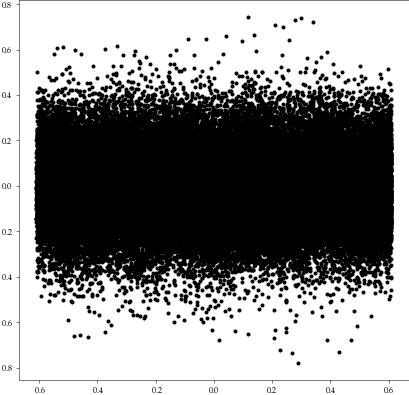

In [34]:
# plt.figure(figsize=[7,7])

# flat_samps = trace.posterior.stack(sample=("chain", "draw"))

# # Compute the GP prediction
# gp_mod = np.median(
#     flat_samps["gp_pred"] + flat_samps["mean"], axis=-1
# )

# # Get the posterior median orbital parameters
# p = np.median(flat_samps["period"])
# t0 = np.median(flat_samps["t0"])

# # Plot the folded data
# x_fold = (x[mask] - t0 + 0.5 * p) % p - 0.5 * p
# plt.plot(x_fold, y[mask],
#          #- gp_mod, 
#          ".k", label="data", zorder=-1000)

# # Overplot the phase binned light curve
# # bins = np.linspace(-0.41, 0.41, 50)
# # denom, _ = np.histogram(x_fold, bins)
# # num, _ = np.histogram(x_fold, bins, weights=y[mask])
# # denom[num == 0] = 1.0
# # plt.plot(
# #     0.5 * (bins[1:] + bins[:-1]), num / denom, "o", color="C2", label="binned"
# # )

# # Plot the folded model
# inds = np.argsort(x_fold)
# inds = inds[np.abs(x_fold)[inds] < 0.3]
# pred = np.percentile(
#     flat_samps["light_curves"][0, inds], [16, 50, 84], axis=-1
# )
# plt.plot(x_fold[inds], pred[1], color="C1", label="model")
# art = plt.fill_between(
#     x_fold[inds], pred[0], pred[2], color="C1", alpha=0.5, zorder=1000
# )
# art.set_edgecolor("none")

# # Annotate the plot with the planet's period
# txt = "period = {0:.5f} +/- {1:.5f} d".format(
#     np.mean(flat_samps["period"]), np.std(flat_samps["period"])
# )
# plt.annotate(
#     txt,
#     (0, 0),
#     xycoords="axes fraction",
#     xytext=(5, 5),
#     textcoords="offset points",
#     ha="left",
#     va="bottom",
#     fontsize=12,
# )

# plt.legend(fontsize=10, loc=4)
# plt.xlim(-0.5 * p, 0.5 * p)
# plt.xlabel("time since transit [days]")
# plt.ylabel("de-trended flux")
# _ = plt.xlim(-0.3, 0.3)

# plt.savefig(f'plots/{row.kic}.png', dpi=300, bbox_inches='tight')

In [20]:
len(y[mask]), len(gp_mod)

(64195, 64192)

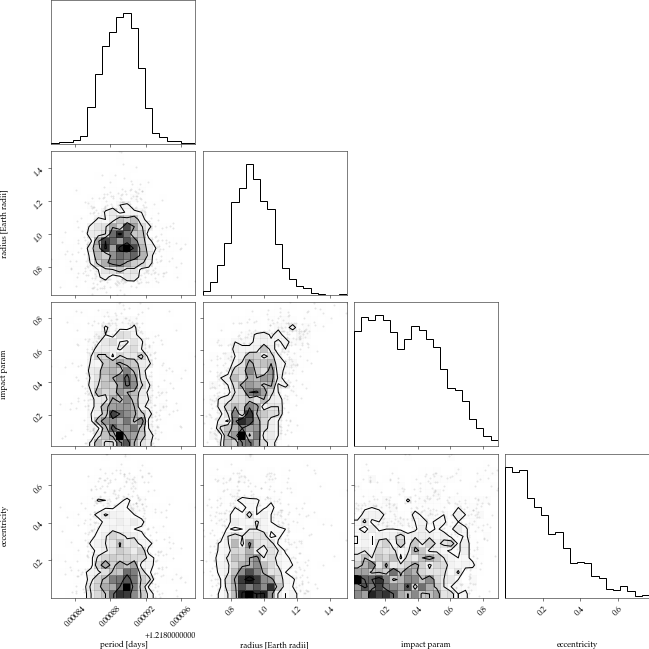

In [28]:
import corner
import astropy.units as u

trace.posterior["r_earth"] = (
    trace.posterior["r_pl"].coords,
    (trace.posterior["r_pl"].values * u.R_sun).to(u.R_earth).value,
)

_ = corner.corner(
    trace,
    var_names=["period", "r_earth", "b", "ecc"],
    labels=[
        "period [days]",
        "radius [Earth radii]",
        "impact param",
        "eccentricity",
    ],
)

In [18]:
dir(trace)

['InferenceDataItemsView',
 'InferenceDataValuesView',
 '__abstractmethods__',
 '__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_group_names',
 '_groups',
 '_groups_all',
 '_groups_warmup',
 '_is_protocol',
 '_repr_html_',
 '_wrap_xarray_method',
 'add_groups',
 'assign',
 'assign_coords',
 'chunk',
 'compute',
 'copy',
 'cumsum',
 'extend',
 'from_netcdf',
 'from_zarr',
 'get',
 'get_index',
 'groups',
 'isel',
 'items',
 'keys',
 'load',
 'log_likelihood',
 'map',
 'max',
 'mean',
 'median',
 'm

In [23]:
trace.to_json('bla.json')

/home/daniel/anaconda3/envs/exoplanet_test/lib/python3.8/site-packages/arviz/data/inference_data.py:436: UserWarning: The attributes are not same for all groups. Considering only the first group `attrs`
  warnings.warn(


TypeError: Object of type DeterministicWrapper is not JSON serializable

In [ ]:
# from astropy.timeseries import BoxLeastSquares

# period_grid = np.exp(np.linspace(np.log(33), np.log(34), 50000))

# bls = BoxLeastSquares(x, y)
# bls_power = bls.power(period_grid, 0.1, oversample=20)

# # Save the highest peak as the planet candidate
# index = np.argmax(bls_power.power)
# bls_period = bls_power.period[index]
# bls_t0 = bls_power.transit_time[index]
# bls_depth = bls_power.depth[index]
# transit_mask = bls.transit_mask(x, bls_period, 0.2, bls_t0)

# fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# # Plot the periodogram
# ax = axes[0]
# ax.axvline(np.log10(bls_period), color="C1", lw=5, alpha=0.8)
# ax.plot(np.log10(bls_power.period), bls_power.power, "k")
# ax.annotate(
#     "period = {0:.4f} d".format(bls_period),
#     (0, 1),
#     xycoords="axes fraction",
#     xytext=(5, -5),
#     textcoords="offset points",
#     va="top",
#     ha="left",
#     fontsize=12,
# )
# ax.set_ylabel("bls power")
# ax.set_yticks([])
# ax.set_xlim(np.log10(period_grid.min()), np.log10(period_grid.max()))
# ax.set_xlabel("log10(period)")

# # Plot the folded transit
# ax = axes[1]
# x_fold = (x - bls_t0 + 0.5 * bls_period) % bls_period - 0.5 * bls_period
# m = np.abs(x_fold) < 0.4
# ax.plot(x_fold[m], y[m], ".k")

# # Overplot the phase binned light curve
# bins = np.linspace(-0.41, 0.41, 32)
# denom, _ = np.histogram(x_fold, bins)
# num, _ = np.histogram(x_fold, bins, weights=y)
# denom[num == 0] = 1.0
# ax.plot(0.5 * (bins[1:] + bins[:-1]), num / denom, color="C1")

# ax.set_xlim(-0.3, 0.3)
# ax.set_ylabel("de-trended flux [ppt]")
# _ = ax.set_xlabel("time since transit")

